<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Наименование-признаков:" data-toc-modified-id="Наименование-признаков:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Наименование признаков:</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Dummy-модель" data-toc-modified-id="Dummy-модель-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dummy модель</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Проверка-статистической-значимости-различий-предсказаний-моделей-на-обучающей-выборке" data-toc-modified-id="Проверка-статистической-значимости-различий-предсказаний-моделей-на-обучающей-выборке-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Проверка статистической значимости различий предсказаний моделей на обучающей выборке</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

# Технологический процесс

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

Опишем каждую стадию:


**1. Флотация**

Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).


**2. Очистка**

Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

# Расчёт эффективности

Эффективность обогащения рассчитывается по формуле

$Recovery = \frac{C \times (F - T)}{F \times (C - T)} \times 100\% $

где:

***C*** — доля золота в концентрате после флотации/очистки;

***F*** — доля золота в сырье/концентрате до флотации/очистки;

***T*** — доля золота в отвальных хвостах после флотации/очистки.

Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причём важен не только финальный продукт, но и черновой концентрат.

## Описание данных

Данные находятся в трёх файлах:


- gold_recovery_train_new.csv — обучающая выборка;


- gold_recovery_test_new.csv — тестовая выборка;


- gold_recovery_full_new.csv — исходные данные.


Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.

Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.

Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

**Технологический процесс**

- *Rougher feed* — исходное сырье
- *Rougher additions (или reagent additions)* — флотационные реагенты: Xanthate, Sulphate, Depressant
- *Xanthate* — ксантогенат (промотер, или активатор флотации);
- *Sulphate* — сульфат (на данном производстве сульфид натрия);
- *Depressant* — депрессант (силикат натрия).
- *Rougher process* (англ. «грубый процесс») — флотация
- *Rougher tails* — отвальные хвосты
- *Float banks* — флотационная установка
- *Cleaner process* — очистка
- *Rougher Au* — черновой концентрат золота
- *Final Au* — финальный концентрат золота

**Параметры этапов**

- *air amount* — объём воздуха
- *fluid levels* — уровень жидкости
- *feed size* — размер гранул сырья
- *feed rate* — скорость подачи

### Наименование признаков:

[этап].[тип_параметра].[название_параметра]

Пример: *rougher.input.feed_ag*

**Возможные значения для блока [этап]:**

*rougher* — флотация

*primary_cleaner* — первичная очистка

*secondary_cleaner* — вторичная очистка

*final* — финальные характеристики


**Возможные значения для блока [тип_параметра]:**

*input* — параметры сырья

*output* — параметры продукта

*state* — параметры, характеризующие текущее состояние этапа

*calculation* — расчётные характеристики

## Подготовка данных

Подключим нужные библиотеки, прочитаем файлы и посмотрим на их значения, размеры и типы данных.

In [1]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.utils import shuffle
from scipy import stats as st
from scipy.stats import levene

from sklearn.metrics import make_scorer

from IPython.display import display
pd.set_option('display.float_format', '{:.2f}'.format)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train.info()
display(df_train.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


In [4]:
df_test.info()
display(df_test.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.80,14.99,8.08,1.01,1398.98,-500.23,1399.14,-499.92,1400.10,...,12.02,-497.80,8.02,-501.29,7.95,-432.32,4.87,-500.04,26.71,-499.71
1,2016-09-01 01:59:59,215.39,14.99,8.08,0.99,1398.78,-500.06,1398.06,-499.78,1396.15,...,12.06,-498.70,8.13,-499.63,7.96,-525.84,4.88,-500.16,25.02,-499.82
2,2016-09-01 02:59:59,215.26,12.88,7.79,1.00,1398.49,-500.87,1398.86,-499.76,1398.08,...,11.96,-498.77,8.10,-500.83,8.07,-500.80,4.91,-499.83,24.99,-500.62
3,2016-09-01 03:59:59,215.34,12.01,7.64,0.86,1399.62,-498.86,1397.44,-499.21,1400.13,...,12.03,-498.35,8.07,-499.47,7.90,-500.87,4.93,-499.96,24.95,-498.71
4,2016-09-01 04:59:59,199.10,10.68,7.53,0.81,1401.27,-500.81,1398.13,-499.50,1402.17,...,12.03,-500.79,8.05,-500.40,8.11,-509.53,4.96,-500.36,25.00,-500.86


In [5]:
df_full.info()
display(df_full.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.06,9.89,5.51,42.19,70.54,10.41,0.90,16.90,2.14,...,14.02,-502.49,12.10,-504.72,9.93,-498.31,8.08,-500.47,14.15,-605.84
1,2016-01-15 01:00:00,6.03,9.97,5.26,42.70,69.27,10.46,0.93,16.63,2.22,...,13.99,-505.50,11.95,-501.33,10.04,-500.17,7.98,-500.58,14.00,-599.79
2,2016-01-15 02:00:00,6.06,10.21,5.38,42.66,68.12,10.51,0.95,16.21,2.26,...,14.02,-502.52,11.91,-501.13,10.07,-500.13,8.01,-500.52,14.03,-601.43
3,2016-01-15 03:00:00,6.05,9.98,4.86,42.69,68.35,10.42,0.88,16.53,2.15,...,14.04,-500.86,12.00,-501.19,9.97,-499.20,7.98,-500.26,14.01,-600.00
4,2016-01-15 04:00:00,6.15,10.14,4.94,42.77,66.93,10.36,0.79,16.53,2.06,...,14.03,-499.84,11.95,-501.05,9.93,-501.69,7.89,-500.36,14.00,-601.50


Интересно, что в тестовой выборке почти нет пропусков в данных. Посмотрим, как сильно изменится датасет, если просто удалить все пропуска в тестовой выборке. напишем функцию, считающую изменение выборки, так как она нам понадобится при исследовании того, как лучше обработать пропуски.

In [6]:
def how_change_df_size_if_we_do_this(df_test, df_train, df_full):
    print('Размер тестовой выборки уменьшится на {:.2%}'.format((len(df_test) - len(df_test.dropna())) / len(df_test)))
    print('Размер обучающей выборки уменьшится на {:.2%}'.format((len(df_train) - len(df_train.dropna())) / len(df_train)))
    print('Размер всего датасета уменьшится на {:.2%}'.format((len(df_full) - len(df_full.dropna())) / len(df_full)))

In [7]:
how_change_df_size_if_we_do_this(df_test, df_train, df_full)

Размер тестовой выборки уменьшится на 1.15%
Размер обучающей выборки уменьшится на 22.14%
Размер всего датасета уменьшится на 17.21%


Первый вариант работы с пропусками - удалить их. Тогда удалится пятая часть обучающей выборки. 

Второй вариант - можно заметить, что прилично много пропусков в колонках с sol. Посмотрим, как поменяются посчитанные выше соотношения в датасете, если сперва удалим колонки с sol.

In [8]:
df_test_without_sol = df_test.drop(['rougher.input.feed_sol'], axis=1)

columns_to_delete = ['final.output.concentrate_sol', 'final.output.tail_sol', 'primary_cleaner.output.tail_sol',\
                     'rougher.output.tail_sol', 'secondary_cleaner.output.tail_sol']
df_train_without_sol = df_train.drop(columns_to_delete, axis=1)
df_full_without_sol = df_full.drop(columns_to_delete, axis=1)

how_change_df_size_if_we_do_this(df_test_without_sol, df_train_without_sol, df_full_without_sol)

Размер тестовой выборки уменьшится на 0.83%
Размер обучающей выборки уменьшится на 12.06%
Размер всего датасета уменьшится на 9.49%


Если мы не будем учитывать sol, количество "мешающих" нам пропусков значительно уменьшается. На этом этапе стоит уточнить у компании, что такое sol, критично ли его удалять. Также при обучении моделей посмотрим, насколько признаки с sol важны.

Пока будем действовать по первому варианту - удалим все пропуски. Однако, будем держать в уме возможность отбрасывания некоторых признаков (например, sol) и того, что некоторые пропуски могут оказаться нулевыми значениями.

In [9]:
df_test.dropna(inplace=True)
df_train.dropna(inplace=True)
df_full.dropna(inplace=True)

print('Размер обучающей выборки:', len(df_train))

Размер обучающей выборки: 11017


Проверим данные на наличие дубликатов.

In [10]:
print('Число дубликатов в обучающей выборке:', df_train.duplicated().sum())
print('Число дубликатов в тестовой выборке:', df_test.duplicated().sum())
print('Число дубликатов во всём датасете:', df_full.duplicated().sum())

Число дубликатов в обучающей выборке: 0
Число дубликатов в тестовой выборке: 0
Число дубликатов во всём датасете: 0


Преобразуем даты в нужный формат и переименуем индексы на даты - так будет удобнее работать в дальнейшем.

In [11]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')

In [12]:
df_train.index = df_train['date']
df_test.index = df_test['date']
df_full.index = df_full['date']

In [13]:
df_train['rougher.output.recovery'].describe()

count   11017.00
mean       82.74
std        13.59
min         0.00
25%        80.00
50%        84.85
75%        89.64
max       100.00
Name: rougher.output.recovery, dtype: float64

Проверим формулу вычисления эффективности обогащения. Напишем функцию.

In [14]:
def recovery(c, f, t):
    """
    Считает Recovery по данной формуле.
    """
    recovery = c * (f - t) / f / (c - t) * 100
    return recovery

Посчитаем Recovery с помощью функции и выведем MAE для обучающей выборки для значений Recovery после флотации:

In [15]:
df_train['rougher.output.recovery_check'] =\
    recovery(df_train['rougher.output.concentrate_au'], df_train['rougher.input.feed_au'],\
                   df_train['rougher.output.tail_au'])
print('MAE =', mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_check']))

MAE = 1.0808737141330234e-14


MAE пренебрежимо мало в сравнении со средним значением Recovery (82.7) , что говорит о том, что эффективность обогащения рассчитана правильно.

Проанализируем признаки, недоступные в тестовой выборке.

In [16]:
differences = pd.Series(list(set(df_train.columns) - set(df_test.columns))).sort_values()
for difference in differences:
    print(difference)

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.recovery
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.recovery
rougher.output.recovery_check
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.out

В тестовой выборке недоступны все *output* значения, среди которых - необходимые для вычисления Recovery и само Recovery. А также недоступны *rougher.calculation* или *рассчётные характеристики*. Все фичи, которых нет в тестовой выборке, стоит удалить и из обучающей, так как при работе модели эти фичи не будут доступны.

### Вывод

- В данных есть пропуски, о которых стоит поговорить с заказчиком, например, нет ли таких пропусков, которые являются нулевым значением признака?
        
- До выяснения вопросов - удалили все пропуски.


- Провели проверку на дубликаты. Их нет.


- Преобразовали даты в правильный формат.


- Проверили, что эффективность обогащения (Recovery), указанная в датасете, соответствуют посчитанным по формуле значениям.


- Переименовали индексы в даты для удобства дальнейшей работы.


- Выяснили, что в тестовой выборке нет некоторых фичей. Их следует удалить и из обучающей выборки.

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки и суммарная концентрация веществ. Посчитаем среднюю концентрацию каждого металла и среднюю суммарную концентрацию веществ на каждом этапе.

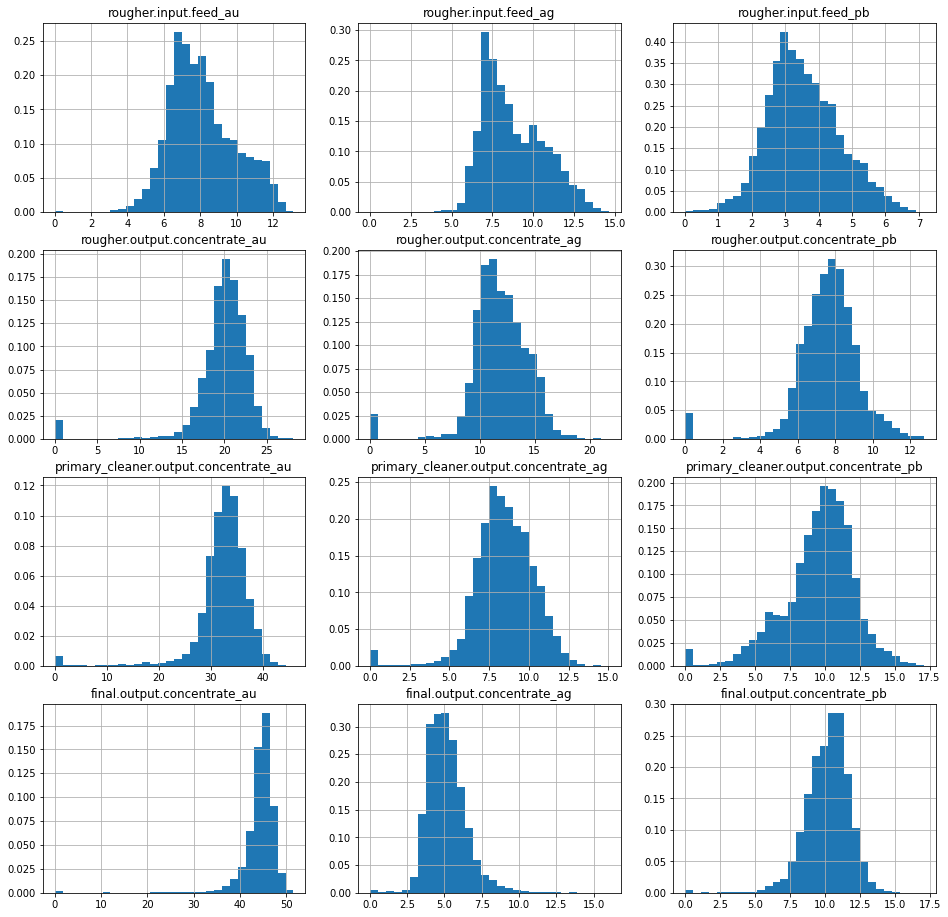

In [17]:
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
metals = ['au', 'ag', 'pb']

fig, axes = plt.subplots(len(stages), len(metals), figsize=(16,16))

data = []
for i in range(len(stages)):
    stage = stages[i]
    row = [] # создаём строку со средними концентрациями металлов и средней суммарной концентрацией в-в на стадии
    name_of_column = stage  + '_sol' # создаем название столбца, содержащего концентрацию sol на стадии
    total_concentrate_name = stage + '_total' # имя столбца с суммарной концентрацией в-в на стадии
    df_train[total_concentrate_name] = df_train[name_of_column] # создали столбец со средней суммарной концентрацией в-в.
                                                                #Записали в него sol

    for j in range(len(metals)):
        metal = metals[j]
        name_of_column = stage + '_' + metal # создаем название столбца, содержащего концентрацию металла на стадии
        df_train[total_concentrate_name] += df_train[name_of_column] # добавляем к столбцу со средней суммарной концентрацией
                                                                        # концентрацию  металла
        row.append(df_train[name_of_column].apply('mean')) # вписываем в row среднюю концентрацию металла на стадии
        df_train[name_of_column].hist(bins=30, density=True,figure=fig, ax=axes[i][j]).set_title(name_of_column)
        
    row.append(df_train[total_concentrate_name].apply('mean')) # вписываем в row среднюю суммарную концентрацию в-в на стадии
    data.append(row) # вписываем в data строку со средними концентрациями металлов и средней суммарной кон-ей в-в на стадии
    
metals.append('total')
df_concentrate_stages = pd.DataFrame(data, index = stages, columns = metals)

In [18]:
display(df_concentrate_stages)

,au,ag,pb,total
rougher.input.feed,8.11,8.77,3.55,56.99
rougher.output.concentrate,19.78,11.84,7.61,67.90
primary_cleaner.output.concentrate,32.38,8.44,9.57,60.75
final.output.concentrate,44.13,5.16,10.17,69.06


В среднем, концентрация золота с каждым этапом значительно растет (от 8% до почти половины!). Концентрация свинца - также растет, но не настолько стремительно (с 3.6% до 10%). Концентрация серебра, в среднем, имеет максимум на стадии после флотации, а потом снижается и становится даже меньше начальной. 

Таким образом, технологический процесс хорошо находит куски с высокой концентрацией золота. Если нам нужны другие металлы - их стоит искать в хвостах каким-то другим способом.

Суммарная концентрация всех веществ значительно растёт после флотации, падает после превичной очистки и снова растет после вторичной. Значительный вклад в суммарную концентрацию вносит золото.

Гистограммы хорошо иллюстрируют, как концентрация золота в среднем растет (с каждым этапом происходит сдвиг вправо), а также, уменьшается разброс (гистограмма становится всё тоньше) - концентрация стремится к среднему значению. Для остальных металлов также происходит утоньшение гистограммы. Возможно, если мы ищем золото, то стоит ожидать, что при этом концентрация серебра и свинца будет небольшой. Также можно заметить пики в районе нулевых значений. Это странно и может служить поводом для разговора с тем, кто понимает технологический процесс лучше. Возможно, это сбой в работе приборов или их поломка. Нули в концентрациях могут ухудшать работу модели, так как в формуле Recovery в знаменателе может получиться 0. Стоит ли удалять нулевые концентрации - так же тема для разговора о целях бизнеса. Если выбросы будут появляться в процессе работы модели, то модель должна с ними как-то справляться на реальных данных.

Построим гистограммы для суммарной концентрации веществ.

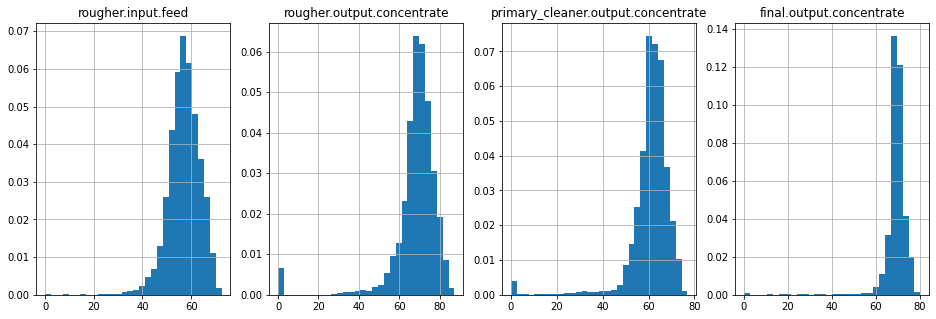

In [19]:
fig, axes = plt.subplots(1, len(stages), figsize=(16,5))

for i in range(len(stages)):
    stage = stages[i]
    total_concentrate_name = stage + '_total'
    df_train[total_concentrate_name].hist(bins=30, density=True,figure=fig, ax=axes[i]).set_title(stage)

In [20]:
for stage in stages:
    for metal in metals:
        name_of_column = stage + '_' + metal
        df_train = df_train[df_train[name_of_column] != 0]

In [21]:
print('Размер обучающей выборки после удаления нулевых концентраций', len(df_train))

Размер обучающей выборки после удаления нулевых концентраций 10737


На гистограммах суммарной концентрации также видны выбросы в нулевых значениях. Также от стадии к стадии происходит уменьшение дисперсии - гистограмма становится тоньше.

Проанализируем распределения размеров гранул на обучающей и тестовой выборках. За нулевую гипотезу примем то, что средние распределений равны, за альтернативную - что нет. Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод t-test.

Для этого сперва построим гистограммы для каждой выборки. 

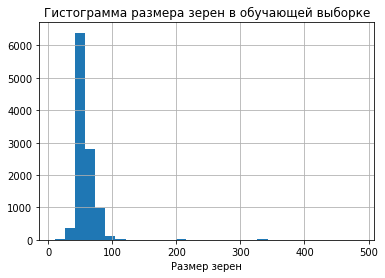

In [22]:
df_train['rougher.input.feed_size'].hist(bins=30).set_title('Гистограмма размера зерен в обучающей выборке')
plt.xlabel('Размер зерен')
plt.show()

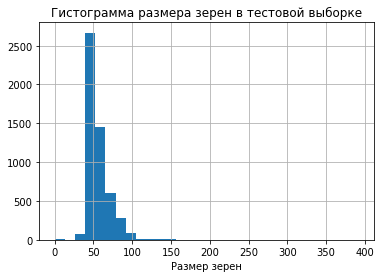

In [23]:
df_test['rougher.input.feed_size'].hist(bins=30).set_title('Гистограмма размера зерен в тестовой выборке')
plt.xlabel('Размер зерен')
plt.show()

Чаще всего встречаются зерна размером не больше 100. Однако, выбросы могут быть важны для модели (насчёт этого момента тоже стоит поговорить с заказчиком - насколько это нормальное явление). А для сравнения распределений - ограничим размеры от 20 до 120.

Построим гистограммы в оговоренном интервале.

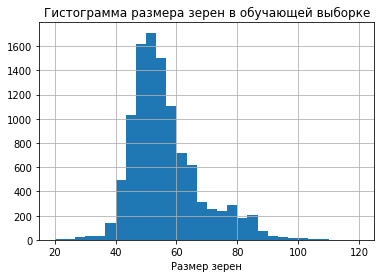

In [24]:
df_train['rougher.input.feed_size'].hist(range=(20, 120), bins=30).set_title('Гистограмма размера зерен в обучающей выборке')
plt.xlabel('Размер зерен')
plt.show()

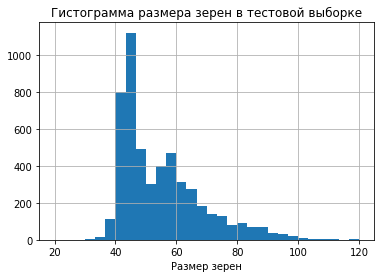

In [25]:
df_test['rougher.input.feed_size'].hist(range=(20, 120), bins=30).set_title('Гистограмма размера зерен в тестовой выборке')
plt.xlabel('Размер зерен')
plt.show()

Визуально распределения похожи (близки к нормальным). Однако, тестовая выборка немного смещена влево. Посмотрим, что покажет ttest. Проведём предварительный статистический тест на равенство дисперсий тестом Левене. Напишем функцию, которая считает дисперсии каждой из выборок, проводит тест Левене, считает equal_var для ttest и проводит его.

In [26]:
def check_variance_and_test_hypothesis(df_1, df_2):
    #Считает дисперсии каждой из выборок, проводит тест Левене, считает equal_var для ttest и проводит его.

    print('Дисперсия рейтинга первой выборки:', np.var(df_1, ddof=1).round())
    print()
    print('Дисперсия рейтинга второй выборки:', np.var(df_2, ddof=1).round())

    stat, p = levene(df_1, df_2)
    print()
    print('Проверка тестом Левене:')
    print()
    print('p-Левене =', p)
    print()
    if p > 0.05:
        print('Дисперсии однородны')
        equal_var_for_ttest = True
    else:
        print('Дисперсии неоднородны')
        equal_var_for_ttest = False
        
    alpha = 0.05  # критический уровень статистической значимости
    # если p-value окажется меньше него - отвергнем гипотезу

    results = st.ttest_ind(df_1, df_2, equal_var = equal_var_for_ttest)
    
    print()
    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')
        
df_1 = df_train[(20 <= df_train['rougher.input.feed_size'])\
                & (df_train['rougher.input.feed_size'] <= 120)]['rougher.input.feed_size']   

df_2 = df_test[(20 <= df_test['rougher.input.feed_size'])\
                & (df_test['rougher.input.feed_size'] <= 120)]['rougher.input.feed_size']  

check_variance_and_test_hypothesis(df_1, df_2)

Дисперсия рейтинга первой выборки: 134.0

Дисперсия рейтинга второй выборки: 186.0

Проверка тестом Левене:

p-Левене = 4.3981538746450733e-44

Дисперсии неоднородны

p-значение: 5.276474655386791e-11
Отвергаем нулевую гипотезу


Для выбранного уровня значимости отвергаем нулевую гипотезу, что средние размеры гранул равны. Это может ухудшить точность модели.

Удалим те признаки, которых нет в тестовой выборке. Проверим признаки на мультиколлинеарность.

In [27]:
corr_level = 0.95

features_names = list(set(df_train.columns) - set(differences) - set(['final.output.concentrate_total', 'date',\
                                                                      'rougher.output.concentrate_total',\
                                                                      'rougher.input.feed_total',\
                                                                      'primary_cleaner.output.concentrate_total']))

corr = df_train[features_names].corr().reset_index().melt(id_vars = ['index'], var_name = ['index_2'])
corr = corr[(corr['value'] != 1) & (corr['value'] > corr_level) & (corr['index'] < corr['index_2'])]

display(corr)

,index,index_2,value
12,rougher.state.floatbank10_c_level,rougher.state.floatbank10_f_level,0.97
20,rougher.state.floatbank10_d_level,rougher.state.floatbank10_f_level,0.97
42,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_level,0.99
47,rougher.state.floatbank10_b_level,rougher.state.floatbank10_f_level,0.96
369,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_b_air,0.96
481,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_level,0.98
671,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_level,0.98
997,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_level,0.97
1001,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_c_level,0.97
1052,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_level,0.99


В таблице представлены сильноскоррелированные признаки. Таким образом, признаки в одном из столбцов (например, столбец index_2) можно удалить, уменьшив корреляционную связь.

In [28]:
print('Было признаков:', len(features_names))
features_names = list(set(features_names) - set(corr['index_2']))
print('Осталось признаков:', len(features_names))

Было признаков: 52
Осталось признаков: 42


### Вывод

- В среднем, **концентрация золота с каждым этапом значительно растет** (от 8% до почти половины!). Концентрация свинца - также растет, но не настолько стремительно (с 3.6% до 10%). Концентрация серебра, в среднем, имеет максимум на стадии после флотации, а потом снижается и становится даже меньше начальной.


- Значительный вклад в суммарную концентрацию вносит золото.


- Гистограммы хорошо иллюстрируют, как уменьшается разброс концентрации с каждым этапом (гистограмма становится всё тоньше) - концентрация стремится к среднему значению. Также **можно заметить пики концентрации в районе нулевых значений**. Это может служить поводом для разговора с тем, кто понимает технологический процесс лучше. **Возможно, это сбой в работе приборов или их поломка**. Нули в концентрациях могут ухудшать работу модели, так как в формуле Recovery в знаменателе может получиться 0. Стоит ли удалять нулевые концентрации - так же тема для разговора о целях бизнеса. Если выбросы будут появляться в процессе работы модели, то модель должна с ними как-то справляться на реальных данных. **Принято решение не удалять нулевые выбросы в концентрациях до разговора с заказчиком.**


- Чаще всего встречаются зерна размером не больше 100. Однако, выбросы могут быть важны для модели (насчёт этого момента тоже стоит поговорить с заказчиком - насколько это нормальное явление).


- Визуально распределения размеров зерен в обучающей и тестовой выборке похожи (близки к нормальным). Однако, тестовая выборка немного смещена влево. Провели ttest. Для выбранного уровня значимости отвергаем нулевую гипотезу, что средние размеры гранул равны. Это может ухудшить точность модели.


- Удалили те признаки, которых нет в тестовой выборке. Проверили признаки на мультиколлинеарность и удалили сильнокоррелирующие.

## Модель

Для оценки качества модели нам понадобится метрика sMAPE и итоговая sMAPE, которые можно найти по формулам:


<div style="font-size: 20px">

$sMAPE = \frac{1}{N} \sum\limits_{i=1}^n \frac{\left | y_i - \widehat{y_i} \right |}{\left ( \left | y_i \right | + \left |\widehat{y_i} \right | \right ) / 2} \times 100\% $
    
    
    
$ \begin{matrix} Итоговое\\ sMAPE \end{matrix} =  25\% \times sMAPE_{rougher} + 75\% \times sMAPE_{final} $
    
</div >   

Напишем функции, вычисляющие sMAPE и итоговую sMAPE.

In [29]:
def smape(target, preds):
    return 1/len(target) * np.sum(np.abs(preds-target) / ((np.abs(target) + np.abs(preds))/2)) * 100

In [30]:
smape_score = make_scorer(smape, greater_is_better=False)

In [31]:
def smape_total(smape_rougher, smape_final):
    """
    Считает итоговую метрику sMAPE.
    """
    smape_total = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_total

Разделим признаки в зависимости от стадии: rougher или final.

In [32]:
features_rougher_names = list(set(pd.Series(features_names)[pd.Series(features_names).str.startswith('rougher')]))
display(features_rougher_names)

['rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_c_air',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.feed_pb',
 'rougher.input.feed_au',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.feed_sol',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.input.feed_ag',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_e_air']

In [33]:
features_final_names = list(set(features_names) - set(features_rougher_names))
display(features_final_names)

['secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_b_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_a_level',
 'secondary_cleaner.state.floatbank3_b_level',
 'primary_cleaner.input.sulfate',
 'secondary_cleaner.state.floatbank3_b_air',
 'primary_cleaner.input.feed_size',
 'secondary_cleaner.state.floatbank5_b_level',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank6_a_level',
 'primary_cleaner.input.xanthate',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'primary_cleaner.state.floatbank8_d_level',
 'primary_cleaner.input.depressant',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank5_a_l

In [34]:
features_rougher_train = df_train[features_rougher_names]
features_final_train = df_train[features_final_names]
target_rougher_train = df_train['rougher.output.recovery']
target_final_train = df_train['final.output.recovery']

Выделим фичи и целевые признаки для тестовой выборки.

In [35]:
features_rougher_test = df_test[features_rougher_names]
features_final_test = df_test[features_final_names]

targets = df_full.loc[df_test.index, ['rougher.output.recovery', 'final.output.recovery']]
#display(targets.info()) 
targets.dropna(inplace=True) # нашли пропуски, удалим их

target_rougher_test = targets['rougher.output.recovery']
target_final_test = targets['final.output.recovery']

#display(targets.info())

KeyError: "[Timestamp('2016-09-04 04:59:59'), Timestamp('2016-09-04 05:59:59'), Timestamp('2016-09-12 02:59:59'), Timestamp('2016-09-14 17:59:59'), Timestamp('2016-09-14 18:59:59'), Timestamp('2016-10-17 15:59:59'), Timestamp('2016-10-23 13:59:59'), Timestamp('2016-10-23 14:59:59'), Timestamp('2016-10-28 21:59:59'), Timestamp('2016-11-01 18:59:59'), Timestamp('2016-11-06 12:59:59'), Timestamp('2016-11-06 15:59:59'), Timestamp('2016-11-06 16:59:59'), Timestamp('2016-11-06 17:59:59'), Timestamp('2016-11-06 18:59:59'), Timestamp('2016-11-06 19:59:59'), Timestamp('2016-11-10 23:59:59'), Timestamp('2016-11-26 19:59:59'), Timestamp('2016-11-27 08:59:59'), Timestamp('2016-12-28 11:59:59'), Timestamp('2016-12-28 12:59:59'), Timestamp('2016-12-28 13:59:59'), Timestamp('2016-12-28 23:59:59'), Timestamp('2016-12-29 00:59:59'), Timestamp('2016-12-29 20:59:59'), Timestamp('2016-12-29 21:59:59'), Timestamp('2016-12-29 22:59:59'), Timestamp('2017-09-02 22:59:59'), Timestamp('2017-09-02 23:59:59'), Timestamp('2017-09-03 00:59:59'), Timestamp('2017-09-03 01:59:59'), Timestamp('2017-09-03 02:59:59'), Timestamp('2017-09-03 03:59:59'), Timestamp('2017-09-03 04:59:59'), Timestamp('2017-09-03 05:59:59'), Timestamp('2017-09-03 06:59:59'), Timestamp('2017-09-03 07:59:59'), Timestamp('2017-09-03 08:59:59'), Timestamp('2017-09-03 09:59:59'), Timestamp('2017-09-03 10:59:59'), Timestamp('2017-09-03 11:59:59'), Timestamp('2017-09-03 12:59:59'), Timestamp('2017-09-03 13:59:59'), Timestamp('2017-09-03 14:59:59'), Timestamp('2017-09-03 15:59:59'), Timestamp('2017-09-03 16:59:59'), Timestamp('2017-09-03 17:59:59'), Timestamp('2017-09-03 18:59:59'), Timestamp('2017-09-03 19:59:59'), Timestamp('2017-09-03 20:59:59'), Timestamp('2017-09-03 21:59:59'), Timestamp('2017-09-03 22:59:59'), Timestamp('2017-09-03 23:59:59'), Timestamp('2017-09-04 00:59:59'), Timestamp('2017-09-04 01:59:59'), Timestamp('2017-09-04 02:59:59'), Timestamp('2017-09-04 03:59:59'), Timestamp('2017-09-04 04:59:59'), Timestamp('2017-09-04 05:59:59'), Timestamp('2017-09-04 06:59:59'), Timestamp('2017-09-07 19:59:59'), Timestamp('2017-09-07 21:59:59'), Timestamp('2017-09-07 22:59:59'), Timestamp('2017-09-07 23:59:59'), Timestamp('2017-09-08 00:59:59'), Timestamp('2017-09-08 01:59:59'), Timestamp('2017-09-08 02:59:59'), Timestamp('2017-09-08 03:59:59'), Timestamp('2017-09-08 04:59:59'), Timestamp('2017-09-14 10:59:59'), Timestamp('2017-09-14 11:59:59'), Timestamp('2017-09-14 17:59:59'), Timestamp('2017-09-14 18:59:59'), Timestamp('2017-09-17 12:59:59'), Timestamp('2017-09-19 19:59:59'), Timestamp('2017-09-19 20:59:59'), Timestamp('2017-09-19 21:59:59'), Timestamp('2017-09-22 19:59:59'), Timestamp('2017-09-23 02:59:59'), Timestamp('2017-09-23 03:59:59'), Timestamp('2017-09-25 02:59:59'), Timestamp('2017-09-26 13:59:59'), Timestamp('2017-09-27 03:59:59'), Timestamp('2017-09-27 04:59:59'), Timestamp('2017-09-27 05:59:59'), Timestamp('2017-09-27 06:59:59'), Timestamp('2017-09-27 07:59:59'), Timestamp('2017-09-27 08:59:59'), Timestamp('2017-09-27 09:59:59'), Timestamp('2017-09-27 10:59:59'), Timestamp('2017-09-27 11:59:59'), Timestamp('2017-09-27 12:59:59'), Timestamp('2017-09-27 13:59:59'), Timestamp('2017-09-27 16:59:59'), Timestamp('2017-09-27 17:59:59'), Timestamp('2017-10-04 11:59:59'), Timestamp('2017-10-05 06:59:59'), Timestamp('2017-10-05 07:59:59'), Timestamp('2017-10-05 08:59:59'), Timestamp('2017-10-07 05:59:59'), Timestamp('2017-10-07 06:59:59'), Timestamp('2017-10-09 07:59:59'), Timestamp('2017-10-11 18:59:59'), Timestamp('2017-10-11 19:59:59'), Timestamp('2017-10-11 20:59:59'), Timestamp('2017-10-12 14:59:59'), Timestamp('2017-10-12 16:59:59'), Timestamp('2017-10-12 17:59:59'), Timestamp('2017-10-12 22:59:59'), Timestamp('2017-10-12 23:59:59'), Timestamp('2017-10-13 12:59:59'), Timestamp('2017-10-13 13:59:59'), Timestamp('2017-10-13 14:59:59'), Timestamp('2017-10-13 15:59:59'), Timestamp('2017-10-17 22:59:59'), Timestamp('2017-10-17 23:59:59'), Timestamp('2017-10-25 16:59:59'), Timestamp('2017-11-03 07:59:59'), Timestamp('2017-11-05 03:59:59'), Timestamp('2017-11-06 13:59:59'), Timestamp('2017-11-06 14:59:59'), Timestamp('2017-11-07 22:59:59'), Timestamp('2017-11-12 13:59:59'), Timestamp('2017-11-12 14:59:59'), Timestamp('2017-11-12 15:59:59'), Timestamp('2017-11-12 16:59:59'), Timestamp('2017-11-12 17:59:59'), Timestamp('2017-11-12 18:59:59'), Timestamp('2017-11-12 19:59:59'), Timestamp('2017-11-12 22:59:59'), Timestamp('2017-11-22 12:59:59'), Timestamp('2017-11-30 01:59:59'), Timestamp('2017-12-02 07:59:59'), Timestamp('2017-12-04 19:59:59'), Timestamp('2017-12-05 23:59:59'), Timestamp('2017-12-12 02:59:59'), Timestamp('2017-12-12 05:59:59'), Timestamp('2017-12-13 16:59:59'), Timestamp('2017-12-13 17:59:59'), Timestamp('2017-12-15 05:59:59'), Timestamp('2017-12-15 06:59:59'), Timestamp('2017-12-15 09:59:59'), Timestamp('2017-12-15 10:59:59'), Timestamp('2017-12-15 11:59:59'), Timestamp('2017-12-15 12:59:59'), Timestamp('2017-12-17 08:59:59'), Timestamp('2017-12-17 11:59:59'), Timestamp('2017-12-17 12:59:59'), Timestamp('2017-12-17 13:59:59'), Timestamp('2017-12-17 14:59:59'), Timestamp('2017-12-26 18:59:59'), Timestamp('2017-12-26 19:59:59')] not in index"

In [ ]:
features_rougher_test = features_rougher_test.loc[target_rougher_test.index]
features_final_test = features_final_test.loc[target_final_test.index]

Масштабируем признаки.

In [ ]:
def scalar_each_dataset(features_train, features_test):

    scaler = StandardScaler()
    scaler.fit(features_train)

    features_train = scaler.transform(features_train).astype('float32')
    features_test = scaler.transform(features_test).astype('float32')
    
    return features_train, features_test

features_rougher_train, features_rougher_test = scalar_each_dataset(features_rougher_train, features_rougher_test)
features_final_train, features_final_test = scalar_each_dataset(features_final_train, features_final_test)

### Dummy модель

Построим dummy-модель, с которой потом сможем сравнить наши модели.

In [ ]:
dummy_regr_rougher = DummyRegressor(strategy="mean")
dummy_regr_final = DummyRegressor(strategy="mean")

dummy_regr_rougher.fit(features_rougher_train, target_rougher_train)
preds_dummy_rougher = dummy_regr_rougher.predict(features_rougher_test)
smape_rougher = smape(target_rougher_test, preds_dummy_rougher)
print('smape_dummy_rougher =', smape_rougher)

dummy_regr_final.fit(features_final_train, target_final_train)
preds_dummy_final = dummy_regr_final.predict(features_final_test)
smape_final = smape(target_final_test, preds_dummy_final)
print('smape_dummy_final =', smape_final)

print('smape_dummy_total =', smape_total(smape_rougher, smape_final))

### Линейная регрессия

Обучим модели линейной регрессии для процессов флотации и очистки. 

In [ ]:
lr = LinearRegression()

def create_model(X_train, y_train, features_names):
    
    hyper_params = [{'n_features_to_select': list(range(1, len(features_names) + 1))}]

    lr.fit(X_train, y_train)
    rfe = RFE(lr)             

    model_cv = GridSearchCV(estimator = rfe, 
                            param_grid = hyper_params, 
                            scoring = smape_score, 
                            cv = 10, 
                            verbose = 1,
                            return_train_score=True)      

    model_cv.fit(X_train, y_train)
    print('Лучшие параметры:', model_cv.best_params_)
    print('sMAPE = {:.2f}'.format(np.abs(model_cv.best_score_)))
    return model_cv.best_estimator_, np.abs(model_cv.best_score_)

In [ ]:
lr_cv_rougher, smape_lr_rougher = create_model(features_rougher_train, target_rougher_train, features_rougher_names)

In [ ]:
lr_cv_final, smape_lr_final = create_model(features_final_train, target_final_train, features_final_names)

In [ ]:
smape_total_lr_train = smape_total(smape_lr_rougher, smape_lr_final)
print('sMAPE_total_lr_train = {:.2f}'.format(smape_total_lr_train))

Посмотрим результат работы моделей на тестовой выборке:

In [ ]:
def get_predictions_and_smape(model_rougher, model_final, features_rougher, features_final, target_rougher, target_final):

    preds_rougher = model_rougher.predict(features_rougher)
    preds_final = model_final.predict(features_final)

    smape_rougher = smape(target_rougher, preds_rougher)
    smape_final = smape(target_final_test, preds_final)
    smape_total_model = smape_total(smape_rougher, smape_final)
    print('sMAPE_rougher = {:.2f}'.format(smape_rougher))
    print('sMAPE_final = {:.2f}'.format(smape_final))
    print('sMAPE_total = {:.2f}'.format(smape_total_model))
    
    return smape_rougher, smape_final, smape_total_model, preds_rougher, preds_final

In [ ]:
smape_lr_rougher_test, smape_lr_final_test, smape_total_lr, preds_rougher_lr, preds_final_lr =\
    get_predictions_and_smape(lr_cv_rougher, lr_cv_final, features_rougher_test, features_final_test,\
                              target_rougher_test, target_final_test)

### Дерево решений

In [ ]:
dtr = RandomForestRegressor(random_state=12345)

parameters = {
    'max_depth' : range(1, 20, 1)
}

def find_best_model_dtr_or_rfr(X_train, y_train, model, parameters):
    grid = GridSearchCV(model, parameters, scoring=smape_score, cv=10)
    grid.fit(X_train, y_train)

    print('Лучшие параметры:', grid.best_params_)
    print('sMAPE = {:.2f}'.format(np.abs(grid.best_score_)))
    return grid, np.abs(grid.best_score_)

In [ ]:
grid_tree_rough, smape_dtr_rough = find_best_model_dtr_or_rfr(features_rougher_train, target_rougher_train, dtr, parameters)

In [ ]:
grid_tree_final, smape_dtr_final = find_best_model_dtr_or_rfr(features_final_train, target_final_train, dtr, parameters)

In [ ]:
smape_total_dtr_train = smape_total(smape_dtr_rough, smape_dtr_final)
print('sMAPE_total_dtr_train = {:.2f}'.format(smape_total_dtr_train))

Посмотрим результат работы моделей на тестовой выборке:

In [ ]:
smape_dtr_rougher_test, smape_dtr_final_test, smape_total_dtr, preds_rougher_dtr, preds_final_dtr =\
    get_predictions_and_smape(grid_tree_rough, grid_tree_final, features_rougher_test, features_final_test,\
                              target_rougher_test, target_final_test)

### Случайный лес

In [ ]:
rfr = RandomForestRegressor(random_state=12345)

parameters = {
    'n_estimators' : range(10, 60, 10),
    'max_depth' : range(1, 20, 2)
}


In [ ]:
grid_forest_rough, smape_rfr_rough = find_best_model_dtr_or_rfr(features_rougher_train, target_rougher_train, rfr, parameters)

In [ ]:
grid_forest_final, smape_rfr_final = find_best_model_dtr_or_rfr(features_final_train, target_final_train, rfr, parameters)

In [ ]:
smape_total_rfr_train = smape_total(smape_rfr_rough, smape_rfr_final)
print('sMAPE_total_rfr_train = {:.2f}'.format(smape_total_rfr_train))

Посмотрим результат работы моделей на тестовой выборке:

In [ ]:
smape_rfr_rougher_test, smape_rfr_final_test, smape_total_rfr, preds_rougher_rfr, preds_final_rfr =\
    get_predictions_and_smape(grid_forest_rough, grid_forest_final, features_rougher_test, features_final_test,\
                              target_rougher_test, target_final_test)

### Проверка статистической значимости различий предсказаний моделей на обучающей выборке

Получили совсем не большую разницу в метриках, проверим эту разницу на статистическую значимость. За нулевую гипотезу примем, что средние распределений предсказанных значений равны, за альтернативную - что нет (сравним dummy со всеми моделями и модели между собой).

In [ ]:
preds_dummy_rougher_train = dummy_regr_rougher.predict(features_rougher_train)
preds_dummy_final_train = dummy_regr_final.predict(features_final_train)

preds_rougher_lr_train = lr_cv_rougher.predict(features_rougher_train)
preds_final_lr_train = lr_cv_final.predict(features_final_train)

preds_rougher_dtr_train = grid_tree_rough.predict(features_rougher_train)
preds_final_dtr_train = grid_tree_final.predict(features_final_train)

preds_rougher_rfr_train = grid_forest_rough.predict(features_rougher_train)
preds_final_rfr_train = grid_forest_final.predict(features_final_train)

In [ ]:
smape_rougher_train = smape(target_rougher_train, preds_dummy_rougher_train)
print('smape_dummy_rougher_train =', smape_rougher_train)

smape_final_train = smape(target_final_train, preds_dummy_final_train)
print('smape_dummy_final_train =', smape_final)

print('smape_dummy_total_train =', smape_total(smape_rougher_train, smape_final_train))

In [ ]:
df_preds_rougher = [preds_dummy_rougher_train, preds_rougher_lr_train, preds_rougher_dtr_train, preds_rougher_rfr_train]
df_preds_rougher_names = ['preds_dummy_rougher', 'preds_rougher_lr', 'preds_rougher_dtr', 'preds_rougher_rfr']

df_preds_final = [preds_dummy_final_train, preds_final_lr_train, preds_final_dtr_train, preds_final_rfr_train]
df_preds_final_names = ['preds_dummy_final', 'preds_final_lr', 'preds_final_dtr', 'preds_final_rfr']

for i in range(len(df_preds_rougher) - 1):
    for j in range(1, len(df_preds_rougher) - i):
        print('Сравниваем', df_preds_rougher_names[i], 'и', df_preds_rougher_names[i + j])
        print()
        check_variance_and_test_hypothesis(df_preds_rougher[i], df_preds_rougher[i + j])
        print('----------------------------------------------------')

In [ ]:
for i in range(len(df_preds_final) - 1):
    for j in range(1, len(df_preds_final) - i):
        print('Сравниваем', df_preds_final_names[i], 'и', df_preds_final_names[i + j])
        print()
        check_variance_and_test_hypothesis(df_preds_final[i], df_preds_final[i + j])
        print('----------------------------------------------------')

## Общий вывод

- В данных есть пропуски, о которых стоит поговорить с заказчиком, например, нет ли таких пропусков, которые являются нулевым значением признака?

        
- До выяснения вопросов - удалили все пропуски.


- Проверили, что эффективность обогащения (Recovery), указанная в датасете, соответствуют посчитанным по формуле значениям.


- Предварительный анализ показал, что можно заметить пики концентрации в районе нулевых значений. Возможно, это сбой в работе приборов или их поломка. Нули в концентрациях могут ухудшать работу модели, так как в формуле Recovery в знаменателе может получиться 0. Если выбросы будут появляться в процессе работы модели, то модель должна с ними как-то справляться на реальных данных. Принято решение не удалять нулевые выбросы в концентрациях до разговора с заказчиком.


- Удалили те признаки, которых нет в тестовой выборке. Проверили признаки на мультиколлинеарность и удалили сильнокоррелирующие.


- Построили dummy-модель, итоговое sMAPE которой равно 8.70.


- Построили модели линейной регрессии, решающего дерева и случайного леса. **Наилучший результат на обучающей выборке показала модель линейной регрессии (sMAPE_total = 7.40)**. На тестовой выборке она показала худший результат среди рассмотренных моделей (sMAPE_total = 8.20), однако, лучше, чем dummy-модель (sMAPE_dummy_total = 8.70). Разница метрик посчитанных моделей - небольшая. Стоит посмотреть на статистическую значимость этой разницы (эта проверка есть, но нужны прояснения, и выводов по ней пока нет).